<a href="https://colab.research.google.com/github/AstxMargaryan/Colab_works/blob/main/Copy_of_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
df = pd.read_csv("Uncleaned_DS_jobs.csv")
df.head() # pandas-ում ցույց է տալիս DataFrame-ի առաջին 5 տողերը։

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [ ]:
df.describe() # միայն թվային (numeric) սյունակների վրա է աշխատում
# քանի հատ արժեք կա
# միջին
# ստանդարտ շեղում
# ամենափոքր
# առաջին քվարցիլ (25%)
# միջնային (median)
# երրորդ քվարցիլ (75%)
 # ամենամեծ

,index,Rating,Founded
count,672.000000,672.000000,672.000000
mean,335.500000,3.518601,1635.529762
std,194.133974,1.410329,756.746640
min,0.000000,-1.000000,-1.000000
25%,167.750000,3.300000,1917.750000
50%,335.500000,3.800000,1995.000000
75%,503.250000,4.300000,2009.000000
max,671.000000,5.000000,2019.000000


In [ ]:
df.duplicated().sum() #krknvox toxer gtnelu hamar duplicated()

np.int64(0)

<Axes: >

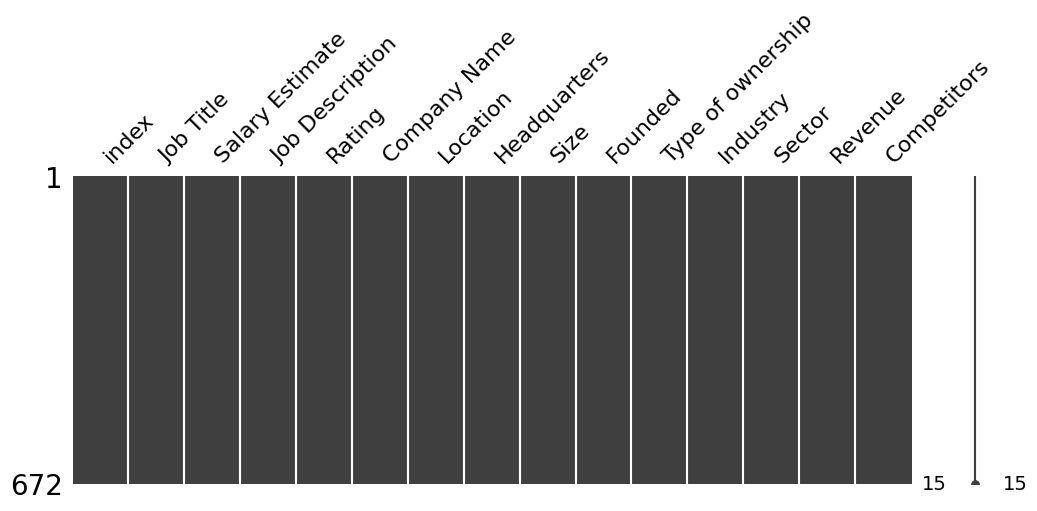

In [ ]:
msno.matrix(df, figsize=(12,4))
# Սև գծերը նշանակում են, որ տվյալ ֆիքսված տեղում արժեք կա(Not Nan),
# Սպիտակ տարածքները (գծեր կամ հատվածներ) ցույց են տալիս բացակա (missing) Nan տվյալները։



In [ ]:
df.isnull().sum() # կտա յուրաքանչյուր սյունակի բացակա արժեքների(Nan eri) քանակը։

,0
index,0
Job Title,0
Salary Estimate,0
Job Description,0
Rating,0
Company Name,0
Location,0
Headquarters,0
Size,0
Founded,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7cf92e9cbce0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf90a2b8320>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf92e9b92e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf90a2b89e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf90a2b8d70>],
 'means': []}

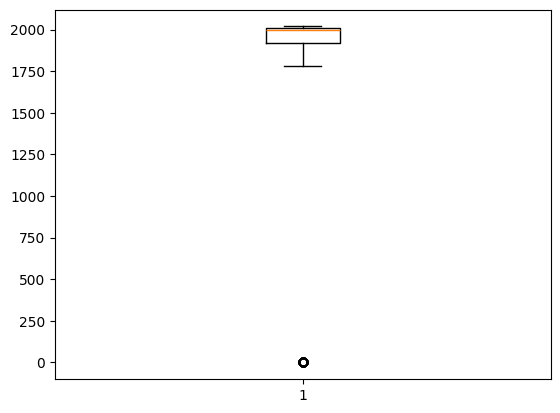

In [ ]:
plt.boxplot(x=df["Founded"]) #Founded" սյունակի (ընկերությունների հիմնադրման տարեթվերի) բաշխումը։
# Սև արկղը (box) — ներկայացնում է հիմնադրման տարիների միջին 50%-ը։(IQR)
# կետերը ● — դրանք outliers

In [ ]:
df.replace(-1,np.nan,inplace=True) # նշանակում է, որ -1 թվերը պետք է փոխարինվեն NaN-ով DataFrame-i

<Axes: >

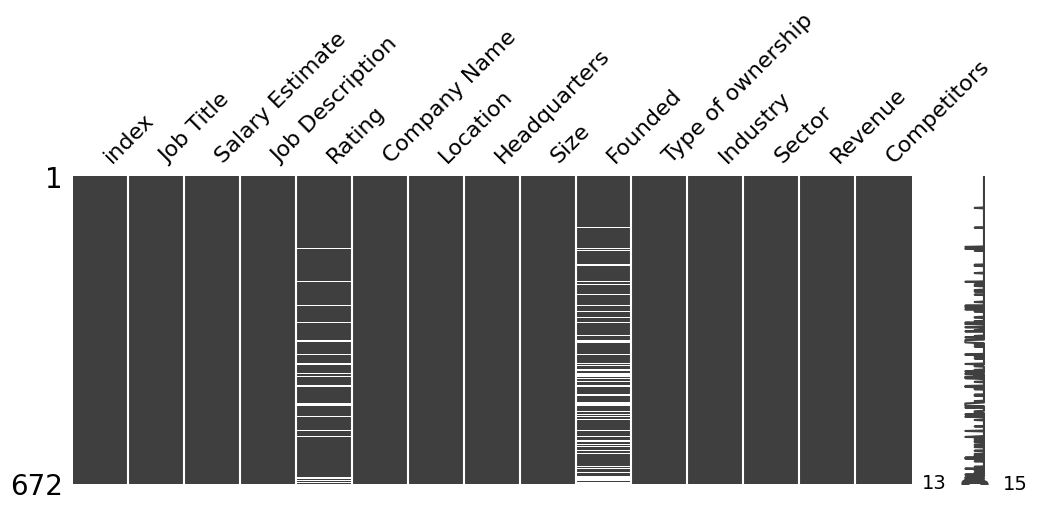

In [ ]:
msno.matrix(df, figsize=(12,4)) # voronq -1 tver ein darel en Nan ev spitakov cuyc a talis

In [ ]:
df["Headquarters"] =="-1" #ստուգում է՝ արդյոք սյունակում կա string "-1"

,Headquarters
0,False
1,False
2,False
3,False
4,False
...,...
667,False
668,True
669,True
670,False


In [ ]:
df.loc[df['Headquarters'] == '-1', 'Headquarters'] = df.loc[df['Headquarters'] == '-1', 'Location']
#Ընտրում է բոլոր այն տողերը, որտեղ 'Headquarters' սյունակի արժեքը հավասար է string '-1'-ին,
#Արդյունքում այդ տողերի 'Headquarters' սյունակի արժեքը փոխարինում է նույն տողում 'Location' սյունակի համապատասխան արժեքով։

In [ ]:
(df['Headquarters'] == '-1').sum()


np.int64(0)

In [ ]:
df.replace('-1',np.nan, inplace=True)

<Axes: >

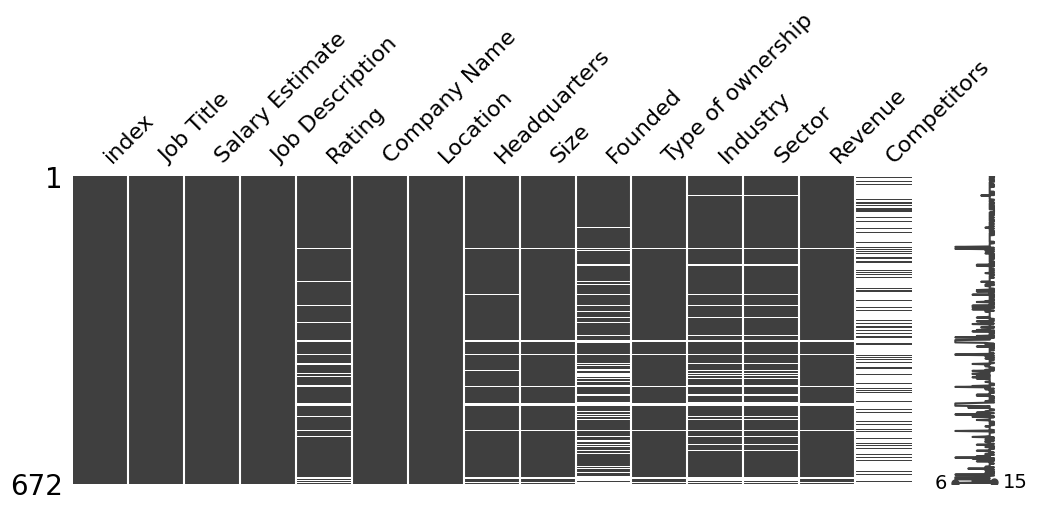

In [ ]:
msno.matrix(df, figsize=(12,4))

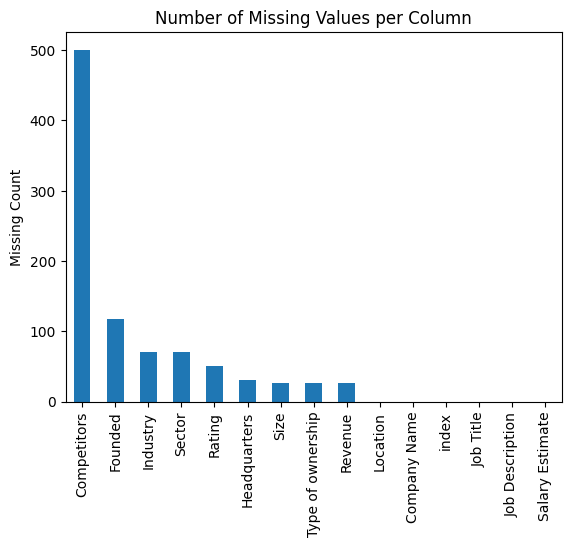

In [ ]:
df.isnull().sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Missing Values per Column')
plt.ylabel('Missing Count')
plt.show()
# բոլոր սյունակների Missing Values (NaN) քանակը բար գրաֆիկի տեսքով՝ մեծից փոքր կարգով:

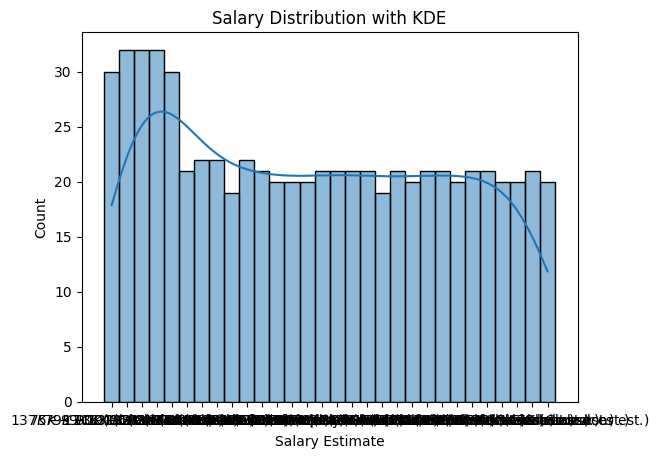

In [ ]:
sns.histplot(df['Salary Estimate'], kde=True, bins=10)
plt.title("Salary Distribution with KDE")
plt.show()
# Salary Estimate սյունակի համար, նաև KDE (Kernel Density Estimate) գծով, որը ցույց է տալիս տվյալների բաշխումը ավելի մեղմված ձևով:

In [ ]:
(df['Rating'] > 5).sum()

np.int64(0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf8fc3bbd10>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf8fc2ceff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf8fc29be00>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf8fc2ccc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf8fc2cdbb0>],
 'means': []}

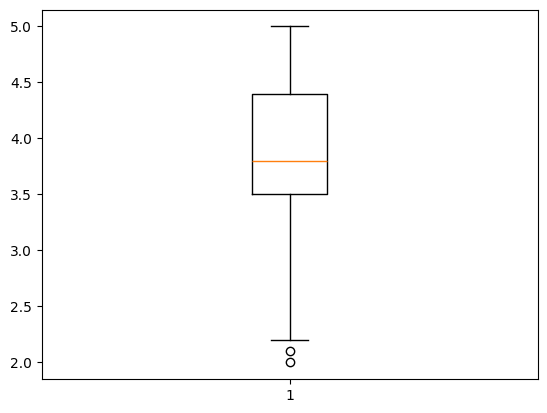

In [ ]:
plt.boxplot(df['Rating'].dropna())

#(box plot)՝ df['Rating'] սյունակի համար, բայց նախ հանում է բոլոր NaN արժեքները՝ .dropna():

In [ ]:
import re

def parse_salary(salary):
    try:
        salary_clean = re.sub(r'[^\d\-]', '', salary)
        parts = salary_clean.split('-')
        if len(parts) == 2:
            min_salary = int(parts[0])
            max_salary = int(parts[1])
            avg_salary = (min_salary + max_salary) / 2
            return pd.Series([min_salary, max_salary, avg_salary])
        else:
            return pd.Series([np.nan, np.nan, np.nan])
    except:
        return pd.Series([np.nan, np.nan, np.nan])

In [ ]:
df[['min_salary', 'max_salary', 'avg_salary']] = df['Salary Estimate'].apply(parse_salary)

In [ ]:
df


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137.0,171.0,154.0
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),NaN,137.0,171.0,154.0
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),NaN,137.0,171.0,154.0
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137.0,171.0,154.0
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137.0,171.0,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,NaN,105.0,167.0,136.0
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,NaN,JKGT,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,167.0,136.0
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,NaN,AccessHope,"Irwindale, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,167.0,136.0
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,NaN,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),NaN,105.0,167.0,136.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7cf8fc1df380>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf8fc1dec30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf8fc1df6b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf8fc1de5a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf8fc1de210>],
 'means': []}

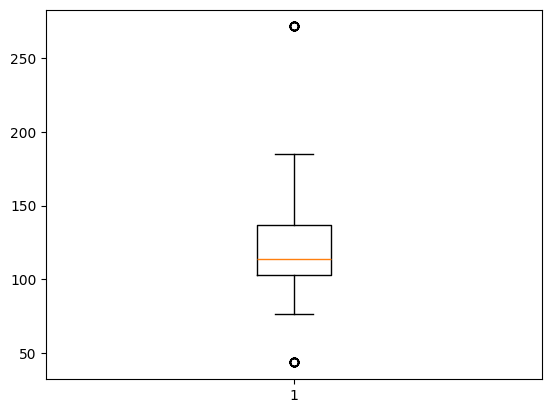

In [ ]:
plt.boxplot(x = df['avg_salary'])

In [ ]:
df.duplicated().sum()

np.int64(0)

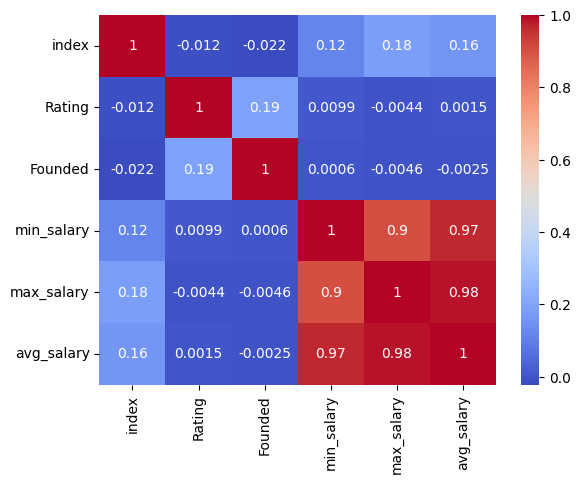

In [ ]:
numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
# or sns.heatmap(df.corr(numeric_only= True), cmap = "Blues", annot=True,fmt = ".2f")
plt.show()
numeric_df.drop('index', axis = 1, inplace=True) # jnjum a index syuny


<Axes: xlabel='max_salary'>

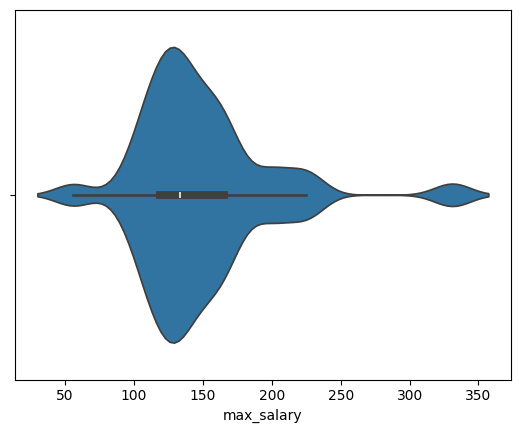

In [ ]:
# numeric_df.drop('Founded', axis='columns', inplace=True)

sns.violinplot(x = numeric_df['max_salary'])
# Ներկայացնում է տվյալների բաշխումը, միջինը, և կուտակումները (density) մեկ վիզուալիզացիայում:
# Օրինակ, լայն մասերը ցույց են տալիս, որ տվյալները այդ արժեքի շուրջ ավելի շատ են խտացած, նեղ մասերը՝ ավելի քիչ:
# numeric_df